In [ ]:
#!pip install undetected-chromedriver
# make sure you also have Chrome installed

In [1]:
import json
import pandas as pd
import undetected_chromedriver as uc

from bs4 import BeautifulSoup

In [71]:
driver = uc.Chrome()
driver.set_page_load_timeout(5)

[08/16/25 16:28:37] INFO     patching driver executable /Users/mckayjohns/Library/Application        ]8;id=915745;file:///Users/mckayjohns/miniforge3/envs/complete-football-analytics/lib/python3.11/site-packages/undetected_chromedriver/patcher.py\patcher.py]8;;\:]8;id=222933;file:///Users/mckayjohns/miniforge3/envs/complete-football-analytics/lib/python3.11/site-packages/undetected_chromedriver/patcher.py#346\346]8;;\
                             Support/undetected_chromedriver/undetected_chromedriver                               

In [72]:
whoscored_url = 'https://www.whoscored.com/matches/1821720/live/spain-laliga-2024-2025-barcelona-real-madrid'

In [73]:
# Scrape the webpage
try:
    driver.get(whoscored_url)
except:
    driver.execute_script("window.stop();")

In [74]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [75]:
# Extract match data from script tag
data = soup.select_one('script:-soup-contains("matchCentreData")')
print(data.text[:1000])


        require.config.params["args"] = {
            matchId:1821720,
            matchCentreData: {"playerIdNameDictionary":{"300447":"Raphinha","130331":"Andreas Christensen","80774":"Marc-André ter Stegen","279423":"Frenkie de Jong","29400":"Robert Lewandowski","73379":"Wojciech Szczesny","106885":"Iñigo Martínez","349760":"Ferran Torres","367164":"Iñaki Peña","368091":"Eric García","382234":"Ansu Fati","402197":"Pedri","422937":"Gavi","422938":"Alejandro Balde","444243":"Pau Víctor","454343":"Marc Casadó","463838":"Fermín López","480249":"Lamine Yamal","483206":"Héctor Fort","498386":"Pau Cubarsí","512879":"Gerard Martín","261212":"Dani Olmo","384711":"Ronald Araujo","73798":"Thibaut Courtois","337782":"Vinícius Júnior","347862":"Rodrygo","20874":"Luka Modric","300713":"Kylian Mbappé","353423":"Aurélien Tchouaméni","317541":"Brahim Díaz","144511":"Lucas Vázquez","144890":"Dani Ceballos","238901":"Jesús Vallejo","516374":"Jacobo Ramón","534899":"Raúl Asencio","415181":"Arda Güler"

In [76]:
matchdict = json.loads(
    data.text.split("matchCentreData: ")[1].split('matchCentreEventTypeJson')[0].strip()[:-1]
)

In [77]:
matchdict.keys()

dict_keys(['playerIdNameDictionary', 'periodMinuteLimits', 'timeStamp', 'attendance', 'venueName', 'referee', 'weatherCode', 'elapsed', 'startTime', 'startDate', 'score', 'htScore', 'ftScore', 'etScore', 'pkScore', 'statusCode', 'periodCode', 'home', 'away', 'maxMinute', 'minuteExpanded', 'maxPeriod', 'expandedMinutes', 'expandedMaxMinute', 'periodEndMinutes', 'commonEvents', 'events', 'timeoutInSeconds'])

In [78]:
# Extract match events
match_events = matchdict['events']
df = pd.DataFrame(match_events)

In [79]:
df.head()

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,endY,goalMouthZ,goalMouthY,isGoal,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,cardType
0,2.813573e+09,2,0,0.0,65,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.813573e+09,2,0,0.0,52,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.813573e+09,3,0,0.0,52,49.9,49.8,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,37.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.813573e+09,4,0,3.0,52,27.7,36.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,19.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.813573e+09,5,0,5.0,52,23.9,19.7,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,45.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


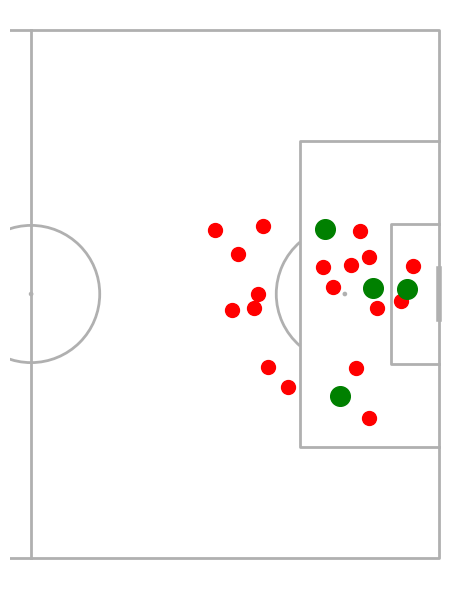

In [80]:
# Quick example of plotting passes
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta', half=True)

fig, ax = pitch.draw(figsize=(8, 6))

df = df[(df['isShot'] == True) & (df['teamId'] == 65)]

pitch.scatter(df['x'], df['y'], s=100, ax=ax, color='red', label='Shots')

goals = df[df['isGoal'] == True]

pitch.scatter(goals['x'], goals['y'], s=200, ax=ax, color='green', label='Goals')